In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
train=pd.read_csv('datasets/AMZN_train.csv', index_col=0)
validation=pd.read_csv('datasets/AMZN_val.csv', index_col=0)
test=pd.read_csv('datasets/AMZN_test.csv', index_col=0)

In [4]:
train

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200
...,...,...,...,...,...,...
2016-05-09,673.950012,686.979980,671.409973,679.750000,679.750000,3982200
2016-05-10,694.000000,704.549988,693.500000,703.070007,703.070007,6105600
2016-05-11,705.789978,719.000000,701.650024,713.229980,713.229980,7338200


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4781 entries, 1997-05-15 to 2016-05-13
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       4781 non-null   float64
 1   High       4781 non-null   float64
 2   Low        4781 non-null   float64
 3   Close      4781 non-null   float64
 4   Adj Close  4781 non-null   float64
 5   Volume     4781 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 261.5+ KB


# Check for stationarity

## Oberservation

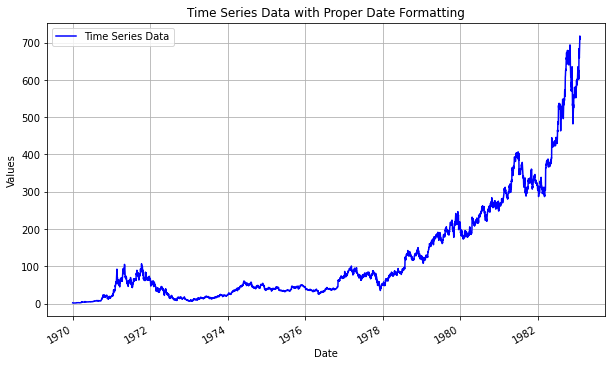

In [193]:
import matplotlib.dates as mdates

# Assuming you have a DataFrame called df with a 'Date' column and 'Value' column
# If not, create a DataFrame with the appropriate data

# Plot the time series data with proper date formatting
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed

# Plot the 'Value' column
plt.plot(train.index, train['Close'], label='Time Series Data', color='blue')

# Set the x-axis date ticks and format the date labels
date_format = mdates.DateFormatter('%Y')  # Choose the desired date format
date_locator = mdates.AutoDateLocator()  # Automatically set the date locator

plt.gca().xaxis.set_major_formatter(date_format)
plt.gca().xaxis.set_major_locator(date_locator)

# Rotate the date labels for better readability
plt.gcf().autofmt_xdate()

plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Time Series Data with Proper Date Formatting')
plt.legend()
plt.grid(True)
plt.show()

<AxesSubplot:xlabel='Date'>

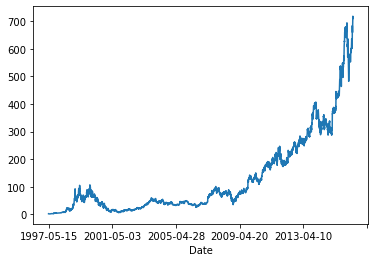

In [204]:
train['Close'].plot()

<AxesSubplot:xlabel='Date'>

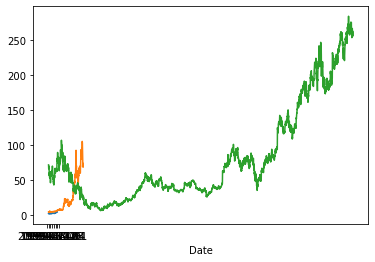

In [205]:
#train.loc['1997-05-15':'2000-01-01','Close'].plot()
train.iloc[0:100,3].plot()
train.iloc[101:500,3].plot()
train.iloc[501:4000,3].plot()


In [7]:
train.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [8]:
train['close_log']=np.log(train['Close'])

In [9]:
train

,Date,Open,High,Low,Close,Adj Close,Volume,close_log
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000,0.672094
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000,0.547640
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800,0.535518
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200,0.491898
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200,0.355633
...,...,...,...,...,...,...,...,...
4776,2016-05-09,673.950012,686.979980,671.409973,679.750000,679.750000,3982200,6.521725
4777,2016-05-10,694.000000,704.549988,693.500000,703.070007,703.070007,6105600,6.555456
4778,2016-05-11,705.789978,719.000000,701.650024,713.229980,713.229980,7338200,6.569804
4779,2016-05-12,717.380005,722.450012,711.510010,717.929993,717.929993,5048200,6.576372


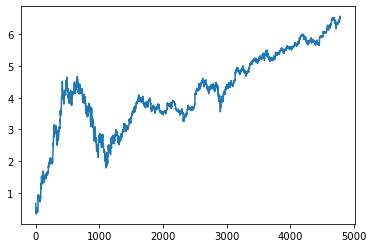

In [10]:
plt.plot(train['close_log'])

## ACF PACF

In [210]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

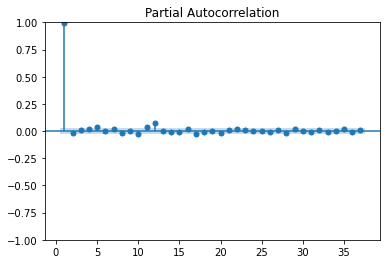

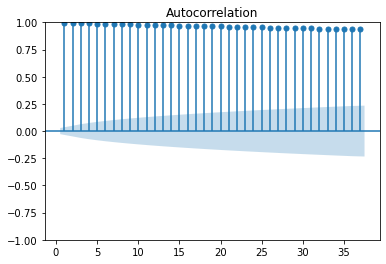

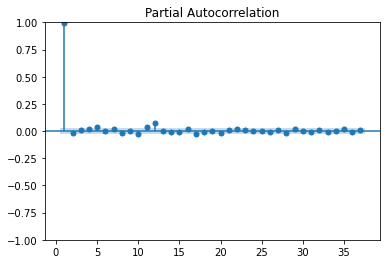

In [211]:
plot_acf(train['Close'],zero=False)
plot_pacf(train['Close'],zero=False)

## ADF test

null hypothesis: there is a unit root (non-stationary)

In [212]:
adftest=adfuller(train['Close'])
print(f'p-value: {adftest[1]}')

p-value: 1.0


In [213]:
adftest

(2.8545396364123836,
 1.0,
 31,
 4749,
 {'1%': -3.431727729661177,
  '5%': -2.8621488004488294,
  '10%': -2.5670940664335538},
 27446.81388986104)

In [214]:
train

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200
...,...,...,...,...,...,...
2016-05-09,673.950012,686.979980,671.409973,679.750000,679.750000,3982200
2016-05-10,694.000000,704.549988,693.500000,703.070007,703.070007,6105600
2016-05-11,705.789978,719.000000,701.650024,713.229980,713.229980,7338200


## de-stationary by differencing

In [215]:
train['Aclose_diff']=train['Adj Close'].diff().dropna()
train['Aclose_diff2']=train['Aclose_diff'].diff().dropna()

In [216]:
train['Adj Close']

Date
1997-05-15      1.958333
1997-05-16      1.729167
1997-05-19      1.708333
1997-05-20      1.635417
1997-05-21      1.427083
                 ...    
2016-05-09    679.750000
2016-05-10    703.070007
2016-05-11    713.229980
2016-05-12    717.929993
2016-05-13    709.919983
Name: Adj Close, Length: 4781, dtype: float64

In [217]:
train.dropna(inplace=True)

In [218]:
train

,Open,High,Low,Close,Adj Close,Volume,Aclose_diff,Aclose_diff2
Date,,,,,,,,
1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800,-0.020834,0.208332
1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200,-0.072916,-0.052082
1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200,-0.208334,-0.135418
1997-05-22,1.437500,1.447917,1.312500,1.395833,1.395833,11776800,-0.031250,0.177084
1997-05-23,1.406250,1.520833,1.333333,1.500000,1.500000,15937200,0.104167,0.135417
...,...,...,...,...,...,...,...,...
2016-05-09,673.950012,686.979980,671.409973,679.750000,679.750000,3982200,5.799988,-9.059997
2016-05-10,694.000000,704.549988,693.500000,703.070007,703.070007,6105600,23.320007,17.520019
2016-05-11,705.789978,719.000000,701.650024,713.229980,713.229980,7338200,10.159973,-13.160034


In [219]:
adfuller(train['Aclose_diff'])

(-12.0711105787597,
 2.3466704232837873e-22,
 30,
 4748,
 {'1%': -3.431728019988808,
  '5%': -2.862148928711039,
  '10%': -2.567094134713042},
 27443.46917590633)

In [220]:
adfuller(train['Aclose_diff2'])

(-20.20166985550529,
 0.0,
 32,
 4746,
 {'1%': -3.431728601011308,
  '5%': -2.862149185397661,
  '10%': -2.567094271358372},
 27563.009829121613)

<AxesSubplot:xlabel='Date'>

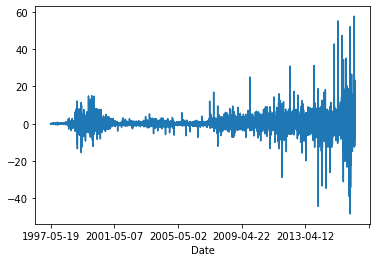

In [222]:
train['Aclose_diff'].plot()

<AxesSubplot:xlabel='Date'>

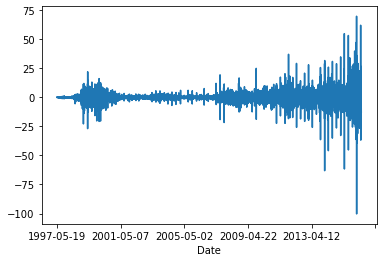

In [223]:
train['Aclose_diff2'].plot()

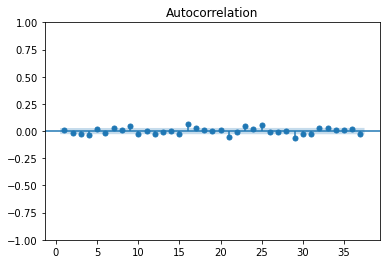

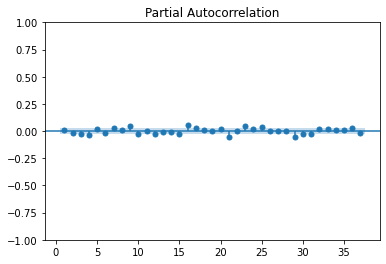

In [224]:
acf_diff=plot_acf(train['Aclose_diff'],zero=False)
pacf_diff=plot_pacf(train['Aclose_diff'],zero=False)

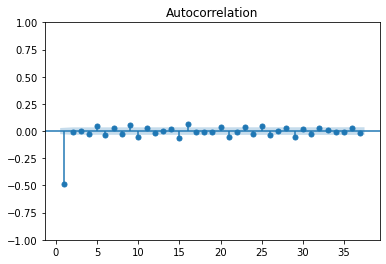

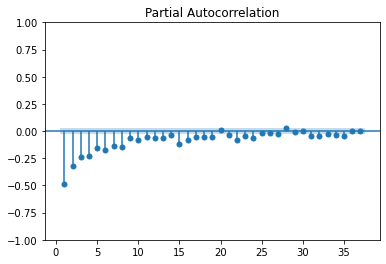

In [225]:
acf_diff2=plot_acf(train['Aclose_diff2'],zero=False)
pacf_diff2=plot_pacf(train['Aclose_diff2'],zero=False)

# Fitting ARIMA model

In [226]:
from statsmodels.tsa.arima.model import ARIMA

### (0,1,0)

In [227]:
model=ARIMA(train['Adj Close'],order=(0,1,0))
model_fit=model.fit()

/Users/qingyunwang/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/qingyunwang/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/qingyunwang/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [228]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                 4779
Model:                 ARIMA(0, 1, 0)   Log Likelihood              -13829.655
Date:                Mon, 24 Jul 2023   AIC                          27661.310
Time:                        15:34:37   BIC                          27667.782
Sample:                             0   HQIC                         27663.583
                               - 4779                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        19.1255      0.089    215.552      0.000      18.952      19.299
Ljung-Box (L1) (Q):                   0.28   Jarque-Bera (JB):            271099.99
Prob(Q):                              0.60   Pr

In [231]:
train_fit=model_fit.fittedvalues


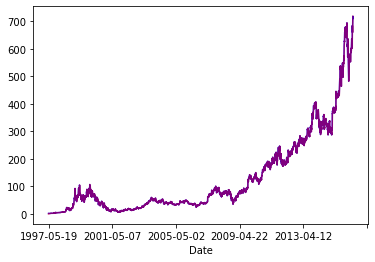

In [234]:
train['Adj Close'].plot(label='Observed', color='blue')
train_fit.plot(label='ARIMA Fitted', color='red',alpha=0.5)
#plt.legend()
plt.show()

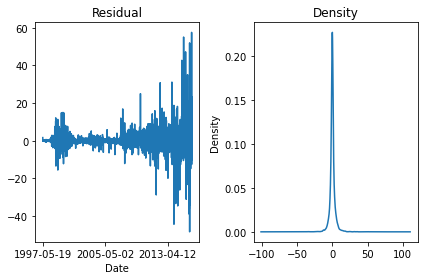

In [235]:
residuals=model_fit.resid
fig,ax=plt.subplots(1,2)
residuals.plot(title='Residual',ax=ax[0])
residuals.plot(title='Density',kind='kde',ax=ax[1])
plt.tight_layout()
plt.show()


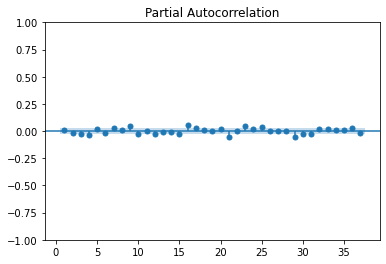

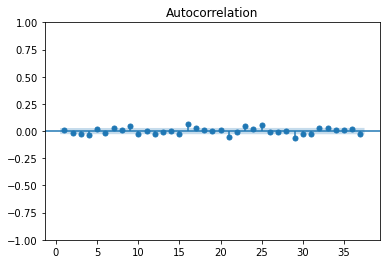

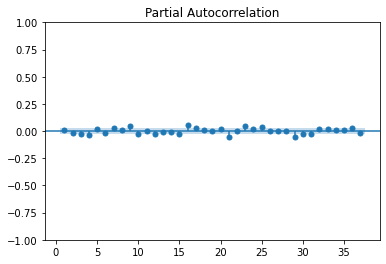

In [237]:
plot_acf(residuals,zero=False)
plot_pacf(residuals,zero=False)

### (1,1,0)

/Users/qingyunwang/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/qingyunwang/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/qingyunwang/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/qingyunwang/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting p

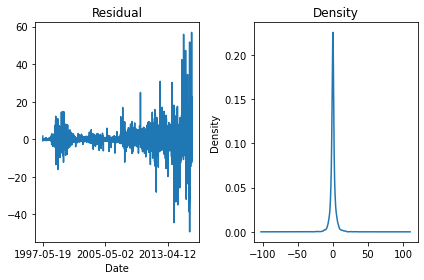

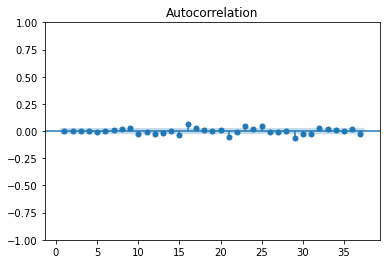

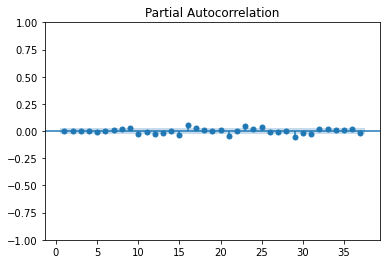

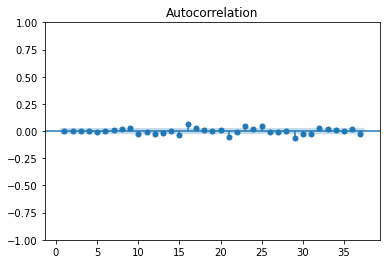

In [300]:
model3=ARIMA(train['Adj Close'],order=(5,2,2))
model3=model3.fit()
residuals3=model3.resid
fig,ax=plt.subplots(1,2)
residuals3.plot(title='Residual',ax=ax[0])
residuals3.plot(title='Density',kind='kde',ax=ax[1])
plt.tight_layout()
plt.show()
plot_pacf(residuals3,zero=False)
plot_acf(residuals3,zero=False)

In [301]:
forecast3=model3.forecast(len(validation['Close']))
validation['Prediction']=forecast3.values
train['Prediction']=model3.fittedvalues.values
train_val=pd.concat([train,validation])

/Users/qingyunwang/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/qingyunwang/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


<AxesSubplot:xlabel='Date'>

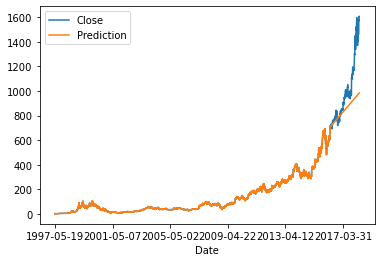

In [302]:
train_val[['Close','Prediction']].plot()

In [308]:
(forecast3.diff().dropna()<0).sum()

0

In [303]:
auto=pm.auto_arima(train['Close'])
auto

ARIMA(order=(5, 2, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [304]:
auto

ARIMA(order=(5, 2, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

# Making prediction